## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [18]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [42]:
df = pd.read_csv('E:\\zomato_project\\notebook\\data\\FuelConsumption_modified.csv')

#### Show Top 5 Records

In [44]:
df.head()

,YEAR,MAKE,ENGINE SIZE,CYLINDERS,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),CO2_EMISSIONS,BROAD_VEHICLE_CLASS,TRANSMISSION_GROUP
0,2000,BMW,2.5,6.0,Premium_gasoline,13.0,8.9,11.2,25.0,258.0,small_car,Basic Automatic
1,2000,BMW,2.5,6.0,Premium_gasoline,12.4,8.6,10.7,26.0,246.0,small_car,Manual
2,2000,BMW,2.5,6.0,Premium_gasoline,12.3,7.8,10.3,27.0,237.0,small_car,Basic Automatic
3,2000,BMW,2.5,6.0,Premium_gasoline,11.5,7.5,9.7,29.0,223.0,small_car,Manual
4,2000,BMW,2.5,6.0,Premium_gasoline,12.3,7.8,10.3,27.0,237.0,small_car,Basic Automatic


In [200]:
# # Remove rows with any null values
# df.dropna(inplace=True)


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3889 entries, 0 to 3888
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 3889 non-null   int64  
 1   MAKE                 3889 non-null   object 
 2   ENGINE SIZE          3889 non-null   float64
 3   CYLINDERS            3889 non-null   float64
 4   FUEL                 3889 non-null   object 
 5   FUEL CONSUMPTION     3889 non-null   float64
 6   HWY (L/100 km)       3889 non-null   float64
 7   COMB (L/100 km)      3889 non-null   float64
 8   COMB (mpg)           3889 non-null   float64
 9   CO2_EMISSIONS        3889 non-null   float64
 10  BROAD_VEHICLE_CLASS  3889 non-null   object 
 11  TRANSMISSION_GROUP   3889 non-null   object 
dtypes: float64(7), int64(1), object(4)
memory usage: 364.7+ KB


In [46]:
import pandas as pd

# Assuming your DataFrame is named df

# Get list of numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Get list of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Display the lists
print("Numerical Columns:")
print(numerical_columns)
print("\nCategorical Columns:")
print(categorical_columns)


Numerical Columns:
['YEAR', 'ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION', 'HWY (L/100 km)', 'COMB (L/100 km)', 'COMB (mpg)', 'CO2_EMISSIONS']

Categorical Columns:
['MAKE', 'FUEL', 'BROAD_VEHICLE_CLASS', 'TRANSMISSION_GROUP']


In [22]:
X = df.drop(columns=['YEAR','CO2_EMISSIONS'],axis=1)   # iv  


In [23]:
y = df['CO2_EMISSIONS']

In [24]:
# Define which columns should be ordinal-encoded and which should be scaled
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

In [25]:
numerical_cols

Index(['ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION', 'HWY (L/100 km)',
       'COMB (L/100 km)', 'COMB (mpg)'],
      dtype='object')

In [26]:
categorical_cols

Index(['MAKE', 'FUEL', 'BROAD_VEHICLE_CLASS', 'TRANSMISSION_GROUP'], dtype='object')

In [27]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
## pipelines
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [28]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [29]:
X = preprocessor.fit_transform(X)

In [30]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((3111, 35), (778, 35))

In [31]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [32]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 2.4030
- Mean Absolute Error: 1.4083
- R2 Score: 0.9978
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.2208
- Mean Absolute Error: 1.3787
- R2 Score: 0.9980


Lasso
Model performance for Training set
- Root Mean Squared Error: 10.4576
- Mean Absolute Error: 5.6776
- R2 Score: 0.9580
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 10.6175
- Mean Absolute Error: 5.5556
- R2 Score: 0.9545


Ridge
Model performance for Training set
- Root Mean Squared Error: 2.4336
- Mean Absolute Error: 1.4475
- R2 Score: 0.9977
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.3118
- Mean Absolute Error: 1.4123
- R2 Score: 0.9978


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 4.8099
- Mean Absolute Error: 2.7413
- R2 Score: 0.9911
---------------------

In [33]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.999148
5,Random Forest Regressor,0.999075
4,Decision Tree,0.998727
0,Linear Regression,0.998010
2,Ridge,0.997843
6,XGBRegressor,0.997056
3,K-Neighbors Regressor,0.982223
8,AdaBoost Regressor,0.960397
1,Lasso,0.954502


In [35]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 99.80


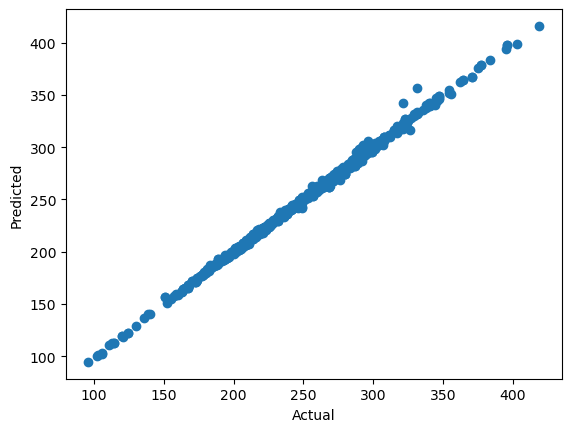

In [36]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

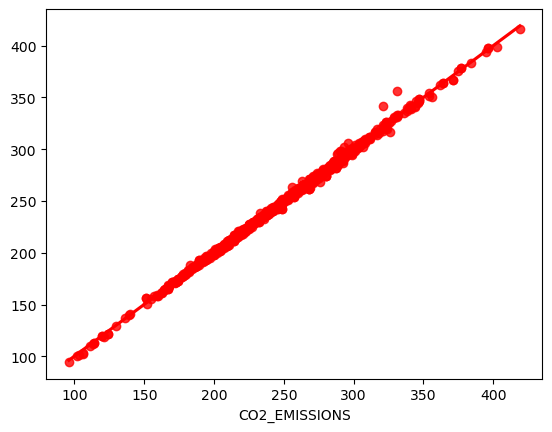

In [37]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [38]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
2392,233.0,232.887911,0.112089
2319,233.0,233.651032,-0.651032
2430,339.0,338.953202,0.046798
3697,354.0,354.322547,-0.322547
315,230.0,230.959701,-0.959701
...,...,...,...
2159,226.0,227.636832,-1.636832
2804,113.0,112.278305,0.721695
2771,279.0,280.018581,-1.018581
978,258.0,260.723739,-2.723739


In [39]:
from dotenv import load_dotenv 